# Выбор локации для скважины

![](https://i.ibb.co/L9xzghV/thumbs-b-c-aa4c409904c3cff6ed60747c8e617e94.jpg)  




Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.  
Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль, а также проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

*Примечание*:  

- *Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).*
- *При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.*
- *Бюджет на разработку скважин в регионе — 10 млрд рублей.*
- *При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.*
- *После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.*
- *Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.*

<footer id="footer"></footer>

<h1>Содержание<span class="tocSkip"></span></h1>
</a></span></li></ul></li><li><span><a href="#Общая-информация-о-данных-в-работе-и-предварительный-осмотр" data-toc-modified-id="Общая-информация-о-данных-в-работе-и-предварительный-осмотр-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о данных в работе и предварительный осмотр</a></span><ul class="toc-item"><li><span><a href="#Импорт-необходимых-библиотек" data-toc-modified-id="Импорт-необходимых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт необходимых библиотек</a></span></li><li><span><a href="#Изучение-сетов-данных" data-toc-modified-id="Изучение-сетов-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение сетов данных</a></span></li><li><span><a href="#Общая-статистика-данных-и-проверка-на-уникальные-значения-и-дубликаты" data-toc-modified-id="Общая-статистика-данных-и-проверка-на-уникальные-значения-и-дубликаты-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Общая статистика данных и проверка на уникальные значения и дубликаты</a></span><ul class="toc-item"><li><span><a href="#Общая-статистика" data-toc-modified-id="Общая-статистика-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Общая статистика</a></span></li><li><span><a href="#Проверка-дубликатов-и-уникальных-значений" data-toc-modified-id="Проверка-дубликатов-и-уникальных-значений-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Проверка дубликатов и уникальных значений</a></span><ul class="toc-item"><li><span><a href="#Регион-1" data-toc-modified-id="Регион-1-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Регион 1</a></span></li><li><span><a href="#Регион-2" data-toc-modified-id="Регион-2-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>Регион 2</a></span></li><li><span><a href="#Регион-3" data-toc-modified-id="Регион-3-1.3.2.3"><span class="toc-item-num">1.3.2.3&nbsp;&nbsp;</span>Регион 3</a></span></li></ul></li></ul></li><li><span><a href="#Удаление-столбцов-и-подготовка-данных" data-toc-modified-id="Удаление-столбцов-и-подготовка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Удаление столбцов и подготовка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Регион-1" data-toc-modified-id="Регион-1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Регион 1</a></span></li><li><span><a href="#Регион-2" data-toc-modified-id="Регион-2-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Регион 2</a></span></li><li><span><a href="#Регион-3" data-toc-modified-id="Регион-3-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Регион 3</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Назначение-переменных-для-ключевых-параметров" data-toc-modified-id="Назначение-переменных-для-ключевых-параметров-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Назначение переменных для ключевых параметров</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Рассчет-прибыли-на-основе-прогнозов-модели" data-toc-modified-id="Рассчет-прибыли-на-основе-прогнозов-модели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Рассчет прибыли на основе прогнозов модели</a></span></li></ul></li><li><span><a href="#Рассчет-рисков-и-прибыль-для-каждого-региона" data-toc-modified-id="Рассчет-рисков-и-прибыль-для-каждого-региона-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Рассчет рисков и прибыль для каждого региона</a></span><ul class="toc-item"><li><span><a href="#Регион-1" data-toc-modified-id="Регион-1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Регион 1</a></span></li><li><span><a href="#Регион-2" data-toc-modified-id="Регион-2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Регион 2</a></span></li><li><span><a href="#Регион-3" data-toc-modified-id="Регион-3-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Регион 3</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Общая информация о данных в работе и предварительный осмотр

In [1]:
!gdown --id 1QbvD4L9NWAXq116HgjwLnnndqKkoNaht
!gdown --id 1n__DBE4TdLuDCSSh0qujRxuVg37sTMuH
!gdown --id 1sRH6QWyVOixJ6sPaGxi_q971ecJ36YP3

Downloading...
From: https://drive.google.com/uc?id=1QbvD4L9NWAXq116HgjwLnnndqKkoNaht
To: /content/geo_data_0.csv
8.21MB [00:00, 128MB/s]
Downloading...
From: https://drive.google.com/uc?id=1n__DBE4TdLuDCSSh0qujRxuVg37sTMuH
To: /content/geo_data_1.csv
8.03MB [00:00, 70.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sRH6QWyVOixJ6sPaGxi_q971ecJ36YP3
To: /content/geo_data_2.csv
8.19MB [00:00, 71.4MB/s]


### Импорт необходимых библиотек

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Изучение сетов данных

In [3]:
reg_1 = pd.read_csv('/content/geo_data_0.csv')
reg_2 = pd.read_csv('/content/geo_data_1.csv')
reg_3 = pd.read_csv('/content/geo_data_2.csv')

In [4]:
reg_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
reg_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


В данных первого региона не наблюдаем пропусков и проблем с типами данных

In [6]:
reg_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
reg_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


В данных второго региона не наблюдаем пропусков и проблем с типами данных

In [8]:
reg_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [9]:
reg_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


В данных третьего региона не наблюдаем пропусков и проблем с типами данных

`id` — уникальный идентификатор скважины;  
`f0`, `f1`, `f2` — три признака точек;  
`product` — объём запасов в скважине (тыс. баррелей).

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Общая статистика данных и проверка на уникальные значения и дубликаты

#### Общая статистика

In [10]:
reg_1.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


In [11]:
reg_2.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


In [12]:
reg_3.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


Общая статистика малоинформативна. Взглянем на значения признаков:  

- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три признака точек (неизвестно, что они означают, но сами признаки значимы);
- `product` — объём запасов в скважине (тыс. баррелей).

Таким образом сказать имеет ли место быть аномалии или выборосы не представляется возможным, ведь мы не знаем какого рода атрибуты заложены в признаки `f0`, `f1`, `f2`, но однозначно можно сказать, что признак `id`в обучении моделей можно не использовать, так как он не несет полезной нагрузки и значимости

Проведем тест Левена и рассмотрим различатся ли дисперсии наших выборок по признаку `product`. 

**Для первого региона и второго**:

In [13]:
sample_1 = reg_1['product']
sample_2 = reg_2['product']

alpha = .05
stat, p = st.levene(sample_1, sample_2)
result_levene = p

# проведем тест Левена

if result_levene < alpha:
    print('Отвергаем Н0, дисперсии различаются')
else:
    print("Не отвергаем Н0, дисперсии не различаются")

var_sample = [np.var(x, ddof=1) for x in [sample_1, sample_2]]
print('Дисперсии по выборкам: ', var_sample)

Отвергаем Н0, дисперсии различаются
Дисперсии по выборкам:  [1961.4881626155943, 2110.8899951518642]


**Для первого региона и третьего:**

In [14]:
sample_1 = reg_1['product']
sample_3 = reg_3['product']

alpha = .05
stat, p = st.levene(sample_1, sample_3)
result_levene = p

# проведем тест Левена

if result_levene < alpha:
    print('Отвергаем Н0, дисперсии различаются')
else:
    print("Не отвергаем Н0, дисперсии не различаются")

var_sample = [np.var(x, ddof=1) for x in [sample_1, sample_3]]
print('Дисперсии по выборкам: ', var_sample)

Не отвергаем Н0, дисперсии не различаются
Дисперсии по выборкам:  [1961.4881626155943, 2002.5554356774542]


**Для второго региона и третьего:**

In [15]:
sample_2 = reg_2['product']
sample_3 = reg_3['product']

alpha = .05
stat, p = st.levene(sample_2, sample_3)
result_levene = p

# проведем тест Левена

if result_levene < alpha:
    print('Отвергаем Н0, дисперсии различаются')
else:
    print("Не отвергаем Н0, дисперсии не различаются")

var_sample = [np.var(x, ddof=1) for x in [sample_2, sample_3]]
print('Дисперсии по выборкам: ', var_sample)

Отвергаем Н0, дисперсии различаются
Дисперсии по выборкам:  [2110.8899951518642, 2002.5554356774542]


<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

#### Проверка дубликатов и уникальных значений

In [16]:
print('Количество полных дубликатов объектов по региону 1:', reg_1.duplicated().sum())
print('Количество полных дубликатов объектов по региону 2:', reg_2.duplicated().sum())
print('Количество полных дубликатов объектов по региону 3:', reg_3.duplicated().sum())

Количество полных дубликатов объектов по региону 1: 0
Количество полных дубликатов объектов по региону 2: 0
Количество полных дубликатов объектов по региону 3: 0


Дубликатов не обнаружено. Проверим количество уникальных значений для всех регионов

In [17]:
reg_1.nunique().to_frame(name='Количество')

,Количество
id,99990
f0,100000
f1,100000
f2,100000
product,100000


In [18]:
print('Доля неуникальных значений признака `id`, в %:{}'.format(
       ((reg_1['id'].count() - reg_1['id'].nunique())/reg_1['id'].count()))
     )

Доля неуникальных значений признака `id`, в %:0.0001


In [19]:
reg_2.nunique().to_frame(name='Количество')

,Количество
id,99996
f0,100000
f1,100000
f2,100000
product,12


In [20]:
print('Доля неуникальных значений признака `id`, в %:{:.5f}'.format(
       ((reg_2['id'].count() - reg_2['id'].nunique())/reg_2['id'].count()))
     )
print('Доля неуникальных значений признака `product`, в %:{}'.format(
       ((reg_2['product'].count() - reg_2['product'].nunique())/reg_2['product'].count()))
     )

Доля неуникальных значений признака `id`, в %:0.00004
Доля неуникальных значений признака `product`, в %:0.99988


In [21]:
reg_3.nunique().to_frame(name='Количество')

,Количество
id,99996
f0,100000
f1,100000
f2,100000
product,100000


In [22]:
print('Доля неуникальных значений признака `id`, в %:{:.5f}'.format(
       ((reg_3['id'].count() - reg_3['id'].nunique())/reg_3['id'].count()))
     )

Доля неуникальных значений признака `id`, в %:0.00004


Посмотрим наши значений на графиках по регионам:

##### Регион 1

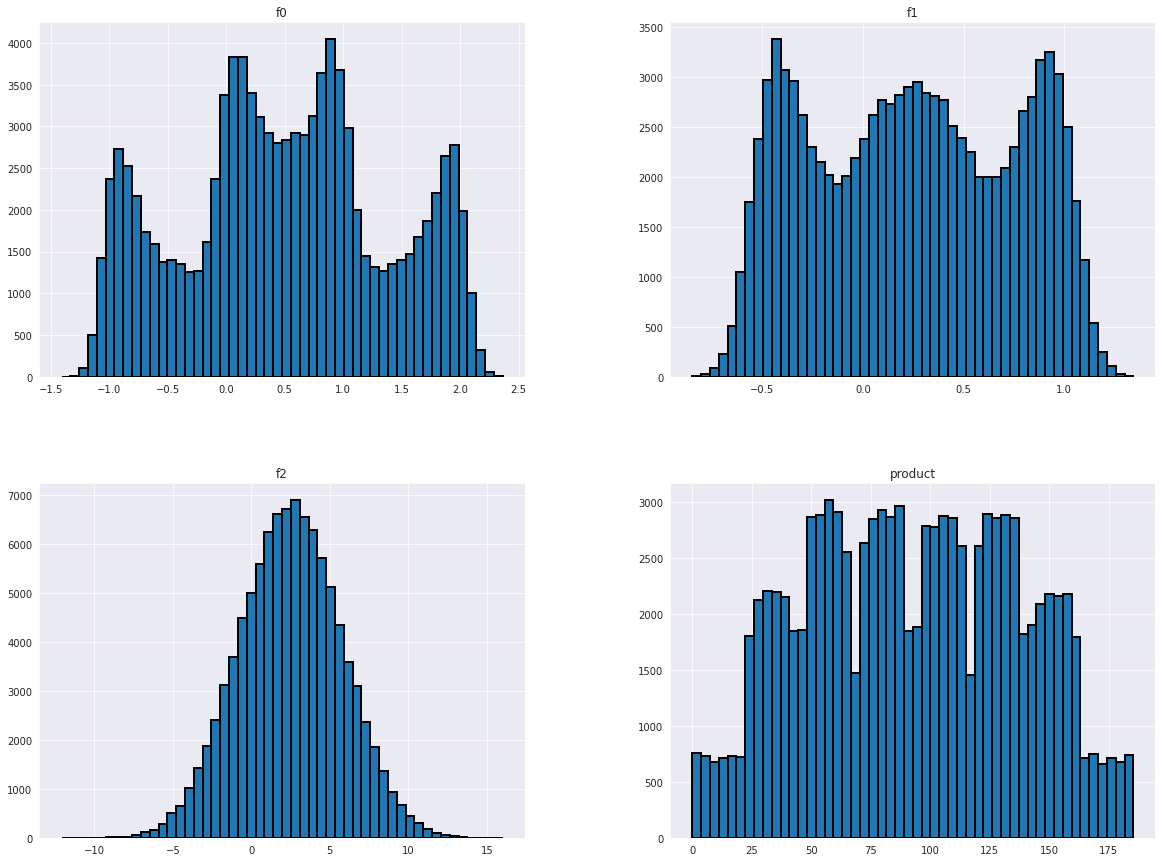

In [23]:
reg_1.hist(bins=50, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()

На первый взгляд здесь все нормально, исследуем наши призаки позже

##### Регион 2

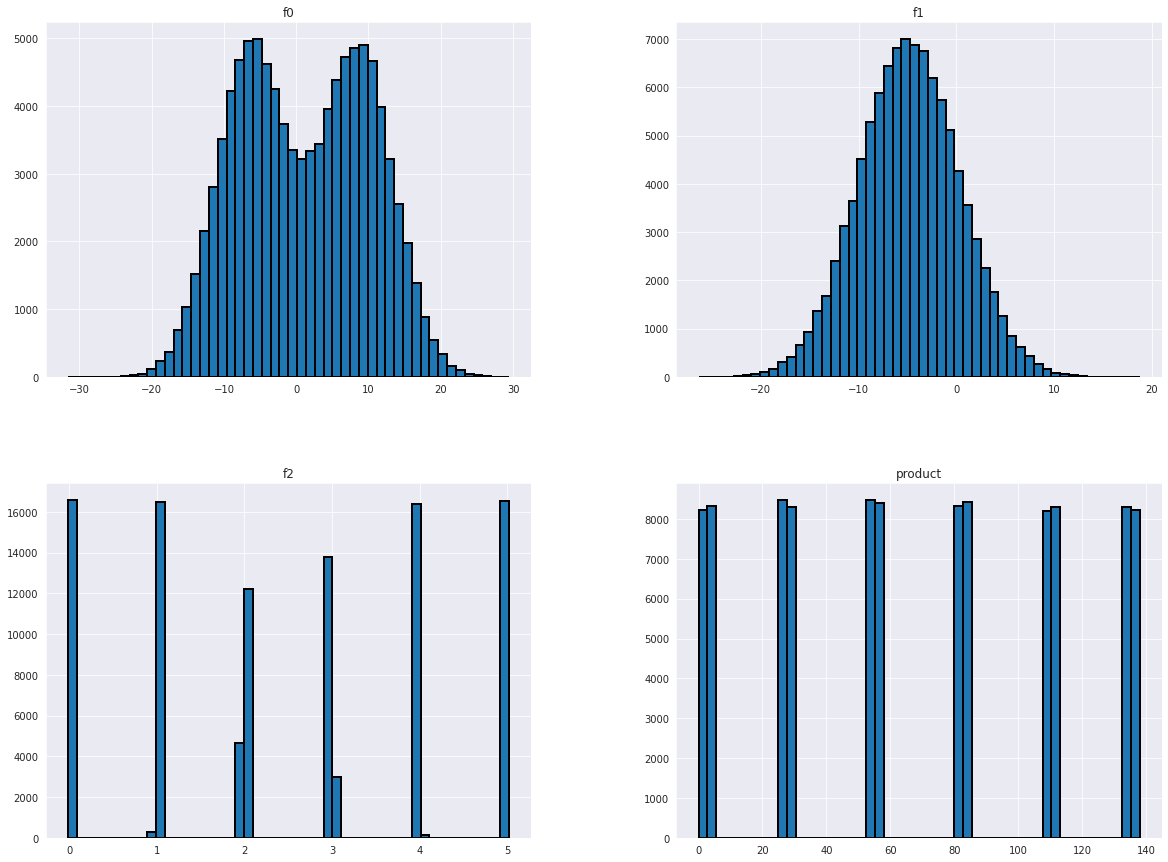

In [24]:
reg_2.hist(bins=50, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()

Значения признаков f2 и product у второго региона довольна подозрительно имеют повторяющиеся значения - возможно эта ошибка сбора данных. Изучим модель на данном сете и сделаем выводы

##### Регион 3

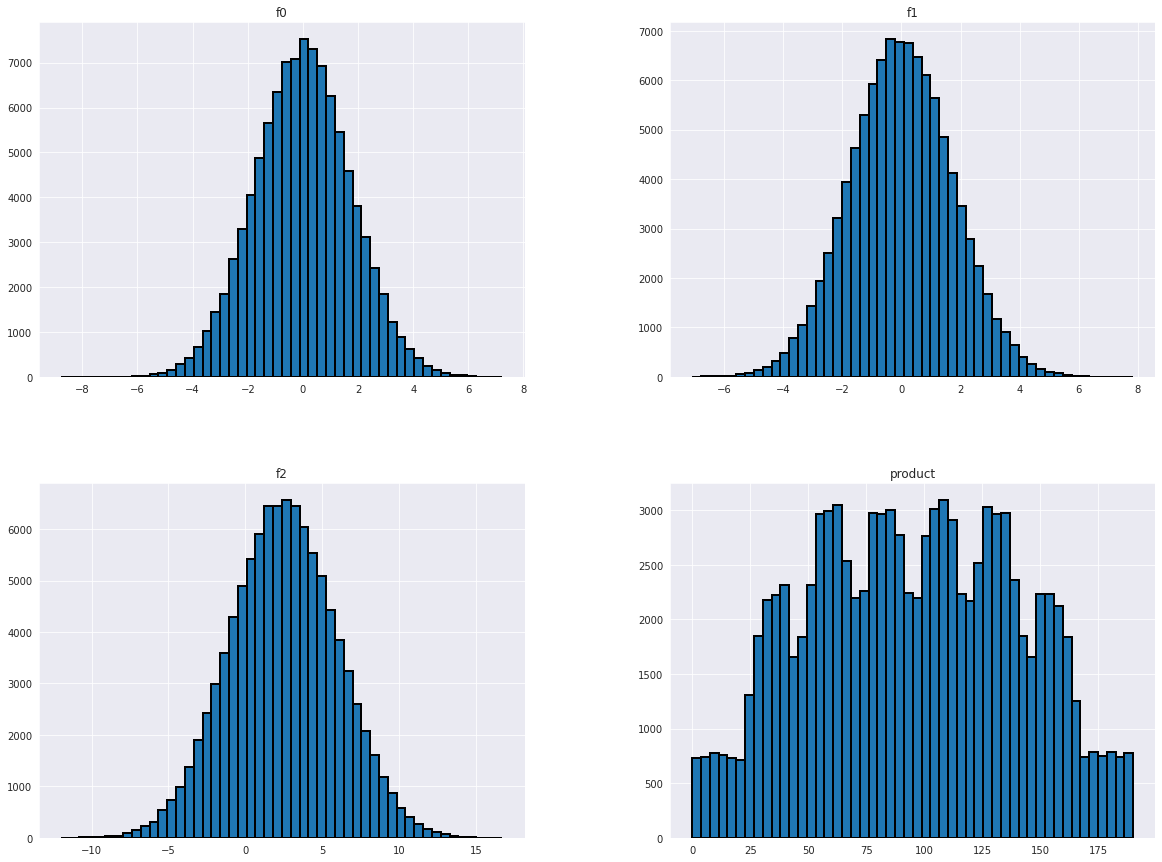

In [25]:
reg_3.hist(bins=50, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()

Здесь также, как и в первом сете, на первый взгляд все достаточно неплохо

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Удаление столбцов и подготовка данных

In [26]:
df_1 = reg_1.drop('id', axis=1)
df_2 = reg_2.drop('id', axis=1)
df_3 = reg_3.drop('id', axis=1)

Столбец удалили. Посмотрим корреляцию между признакми для информации

In [27]:
df_1.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [28]:
df_2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [29]:
df_3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Есть корреляция между признаками `f2` и `product` - самая значительная у второго сета, где были обнаружены идентичные значения по продукции. Думаю, что модель, обученная на втором сете данных будет показывать плохие результаты. Проверим

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Вывод

- вводных данных достаточно мало, чтобы точно определить значения признаков `f0`, `f1`, `f2` - это могут быть стандартизированные характеристики качества месторождения, вязкости нефтепродуктов - так или иначе признаки значимы и работать будем с ними в будущем  
- в сетах данных наблюдаются повторения по `id`, незначительные - но они есть - вероятнее всего данный факт связан с тем, что замеры брались несколько раз из различных скважин. 
- стоит отметит, что в `регионе 2` достаточно мало уникальных значений в признаке `product` - вероятнее всего имеет место быть некоторого рода ошибка
- признак `id` удалили из сетов - чтобы он не мешал обучению моделей

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

## Обучение и проверка модели

In [30]:
model = LinearRegression()

In [31]:
par_grid = {
          'fit_intercept':[True, False], 
          'normalize':[True, False], 
          'copy_X':[True, False]
         }

In [32]:
# для выделения целевого признака
def split_data(data, target_column):
    return data.drop(columns=[target_column], axis=1), data[target_column]

# для контроля длины выборок

def print_info(data, x, x_val):
    return print(' Количество образцов обучающей выборки:', len(x),'\n',
                 'Количество образцов валидационной выборки:', len(x_val),'\n',
                 'Сумма выборок:', len(x) + len(x_val),'\n',
                 'Количество образцов подготовленной выборки (контрольная сумма):', len(data))
# для получения лучшей модели

def grid_search(x,y):
    grid_search = GridSearchCV(model, par_grid, cv=5)
    grid_search.fit(x, y)
    return grid_search.best_estimator_

# для получения таблицы предсказаний и ответов

def report(rep, y, region, pred):
    rep = pd.DataFrame(y)
    rep['predicted'] = pred
    rep['region'] = region
    return rep

# для получения отчета по региону

def params(report, true, pred):
    return print(' Средние запасы по региону, предсказанные моделью: {:.2f}'.format(report.mean()),'\n',
                'MSE модели: {:.3f}'.format(mean_squared_error(true, pred)),'\n',
                'RMSE модели: {:.3f}'.format(np.sqrt(mean_squared_error(true, pred))),'\n',
                'MAE модели: {:.3f}'.format(mean_absolute_error(true, pred)),'\n',
                'Коэффициент детерминации R2:{:.3f}'.format(r2_score(true, pred))
                )
# для добавления данных в общую таблицу

def summary(report, true, pred, name):
    mean_prod = report.mean()
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred)
    return results.append((name, mean_prod, mse, rmse, mae, r2))

#график для построяние пересечений значений

def plot_hex(x,y, data):
    sns.jointplot(x=x, y=y, data=data, kind='hex', height=9, space=.05);

    
    
    

In [33]:
results = []

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Регион 1

In [34]:
features_1, target_1 = split_data(df_1,'product')

In [35]:
X_train_1, X_test_1, y_train_1, y_test_1 = ( 
                                     train_test_split(
                                     features_1, target_1, test_size=.25, 
                                      random_state=42)
                                     )


In [36]:
print_info(df_1, X_train_1, X_test_1)

 Количество образцов обучающей выборки: 75000 
 Количество образцов валидационной выборки: 25000 
 Сумма выборок: 100000 
 Количество образцов подготовленной выборки (контрольная сумма): 100000


In [37]:
X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape

((75000, 3), (25000, 3), (75000,), (25000,))

In [38]:
lr_1 = grid_search(X_train_1, y_train_1)
predicted_prod_1 = lr_1.predict(X_test_1)

In [39]:
reg_1_report = []
reg_1_report = report(reg_1_report, y_test_1, 1, predicted_prod_1)
reg_1_report.head()

,product,predicted,region
75721,122.073350,101.901017,1
80184,48.738540,78.217774,1
19864,131.338088,115.266901,1
76699,88.327757,105.618618,1
92991,36.959266,97.980185,1


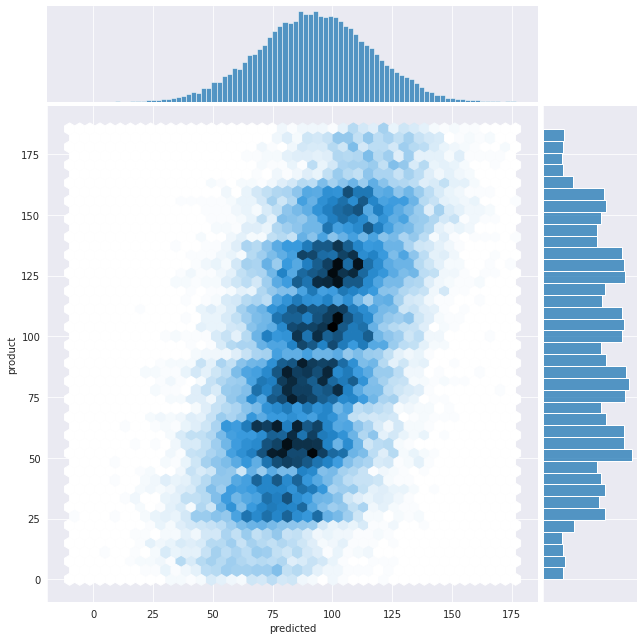

In [40]:
plot_hex('predicted','product', reg_1_report)

In [41]:
params(reg_1_report['predicted'], y_test_1, predicted_prod_1)

 Средние запасы по региону, предсказанные моделью: 92.40 
 MSE модели: 1425.561 
 RMSE модели: 37.757 
 MAE модели: 31.048 
 Коэффициент детерминации R2:0.273


In [42]:
summary(reg_1_report['predicted'], y_test_1, predicted_prod_1, 'Region_1')

Проверим модель на адекватность - возьмем константное значение - медиану

In [43]:
pred_const_1 = pd.Series(y_train_1.median(), index=y_test_1.index)
print("Median")
print('MAE константы: {:.3f}'.format(mean_absolute_error(y_test_1, pred_const_1)))

Median
MAE константы: 37.643


Вывод:  

- в среднем модель предсказывает 92.4 тыс. баррелей нефти по первому региону
- среднеквадратичная ошибка прогноза - 1425.561
- квадратный корень из среднеквадратичной ошибки - 37.757
- средняя абсолютная ошибка для первого региона - 31.048 - достаточно много, при условии что измеряем в тыс. баррелей, но лучше константы
- R2 достаточно низкий

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Регион 2

In [44]:
features_2, target_2 = split_data(df_2,'product')

In [45]:
X_train_2, X_test_2, y_train_2, y_test_2 = ( 
                                     train_test_split(
                                     features_2, target_2, test_size=.25, 
                                      random_state=42)
                                     )


In [46]:
print_info(df_2, X_train_2, X_test_2)

 Количество образцов обучающей выборки: 75000 
 Количество образцов валидационной выборки: 25000 
 Сумма выборок: 100000 
 Количество образцов подготовленной выборки (контрольная сумма): 100000


In [47]:
lr_2 = grid_search(X_train_2, y_train_2)
predicted_prod_2 = lr_2.predict(X_test_2)

In [48]:
reg_2_report = []
reg_2_report = report(reg_2_report, y_test_2, 2, predicted_prod_2)
reg_2_report.head()

,product,predicted,region
75721,0.000000,0.844738,2
80184,53.906522,52.921612,2
19864,134.766305,135.110385,2
76699,107.813044,109.494863,2
92991,0.000000,-0.047292,2


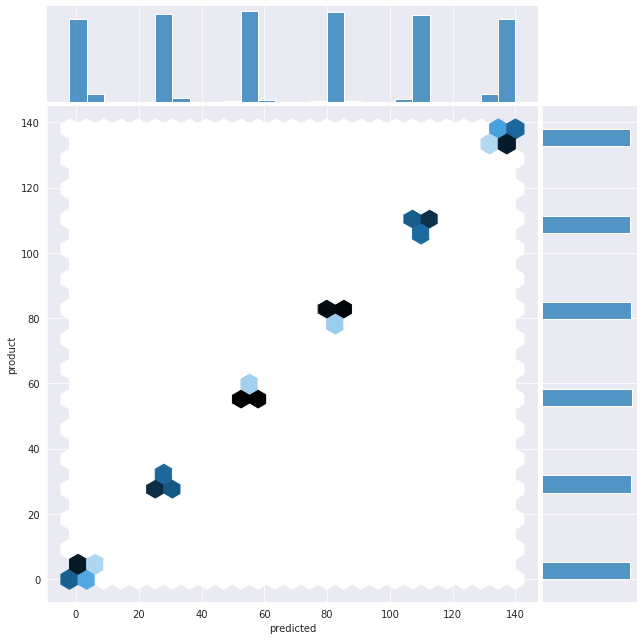

In [49]:
plot_hex('predicted','product', reg_2_report)

In [50]:
params(reg_2_report['predicted'], y_test_2, predicted_prod_2)

 Средние запасы по региону, предсказанные моделью: 68.71 
 MSE модели: 0.793 
 RMSE модели: 0.890 
 MAE модели: 0.717 
 Коэффициент детерминации R2:1.000


In [51]:
summary(reg_2_report['predicted'], y_test_2, predicted_prod_2, 'Region_2')

Проверим модель на адекватность - возьмем константное значение - медиану

In [52]:
pred_const_2 = pd.Series(y_train_2.median(), index=y_test_2.index)
print("Median")
print('MAE константы: {:.3f}'.format(mean_absolute_error(y_test_2, pred_const_2)))

Median
MAE константы: 40.216


Вывод:  

- в среднем модель предсказывает 68.71 тыс. баррелей нефти по первому региону
- среднеквадратичная ошибка прогноза - 0.793
- квадратный корень из среднеквадратичной ошибки - 0.890
- средняя абсолютная ошибка для первого региона - 0.717 

Казалось бы, отличная модель - предсказывает все почти без ошибок. Но у данных достатточно подозрительное распределение, что мы видели выше. К этим предсказаниям стоит относиться с подозрением и уточнить у коллег причину, почему данные распределены таким образом по целевому показателю и признаку f2



<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Регион 3

In [53]:
features_3, target_3 = split_data(df_3,'product')

In [54]:
X_train_3, X_test_3, y_train_3, y_test_3 = ( 
                                     train_test_split(
                                     features_3, target_3, test_size=.25, 
                                      random_state=42)
                                     )


In [55]:
print_info(df_3, X_train_3, X_test_3)

 Количество образцов обучающей выборки: 75000 
 Количество образцов валидационной выборки: 25000 
 Сумма выборок: 100000 
 Количество образцов подготовленной выборки (контрольная сумма): 100000


In [56]:
lr_3 = grid_search(X_train_3, y_train_3)
predicted_prod_3 = lr_3.predict(X_test_3)

In [57]:
reg_3_report = []
reg_3_report = report(reg_3_report, y_test_3, 3, predicted_prod_3)
reg_3_report.head()

,product,predicted,region
75721,117.441301,98.301916,3
80184,47.841249,101.592461,3
19864,45.883483,52.449099,3
76699,139.014608,109.922127,3
92991,84.004276,72.411847,3


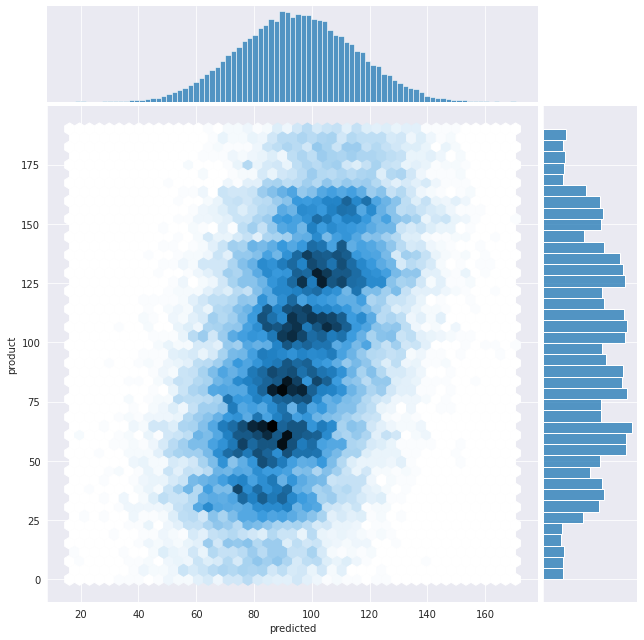

In [58]:
plot_hex('predicted','product', reg_3_report)

In [59]:
params(reg_3_report['predicted'], y_test_3, predicted_prod_3)

 Средние запасы по региону, предсказанные моделью: 94.77 
 MSE модели: 1611.691 
 RMSE модели: 40.146 
 MAE модели: 32.897 
 Коэффициент детерминации R2:0.196


In [60]:
summary(reg_3_report['predicted'], y_test_3, predicted_prod_3, 'Region_3')

Проверим модель на адекватность - возьмем константное значение - медиану

In [61]:
pred_const_3 = pd.Series(y_train_3.median(), index=y_test_3.index)
print("Median")
print('MAE константы: {:.3f}'.format(mean_absolute_error(y_test_3, pred_const_3)))

Median
MAE константы: 37.831


Вывод:  

- в среднем модель предсказывает 94.77 тыс. баррелей нефти по первому региону
- среднеквадратичная ошибка прогноза - 1611.691
- квадратный корень из среднеквадратичной ошибки - 40.146
- средняя абсолютная ошибка для первого региона - 32.897 и также лучше константы

Результаты немногим хуже, чем у первого региона

**Выведем общую информацию**

In [62]:
summary = pd.DataFrame(results, columns=['model', 'mean', 'mse', 'rmse', 'mae', 'r2'])
summary.style.highlight_max(color = 'lightblue', axis = 0).highlight_min(color = 'pink', axis = 0)

,model,mean,mse,rmse,mae,r2
0,Region_1,92.398800,1425.560870,37.756600,31.047682,0.272829
1,Region_2,68.712878,0.792599,0.890280,0.717012,0.999625
2,Region_3,94.771024,1611.691064,40.145872,32.896959,0.196347


По второму региону модель ведет себя слишком идеально, чтобы это было правдой. Лучшая модель и регион для исследования считаю - регион 1

### Вывод

1. построили три модели линейно регрессии:  
  
  - RMSE 1 модели: 37.757
  - RMSE 2 модели: 0.890
  - RMSE 3 модели: 40.146
  
Результаты сложно назвать удовлетворительными, при этом стоит отметить, что модель 2 не стоит брать в рассчет - результаты слишком хорошие, а мы видели, что признак `product` просто сгруппирован по 6 группам. Необходимо уточнить причины таких группировок и сделать перерасчет. По 1 и 3 модели - стоит уточнить данные и возможно улучшить прогнозы  

2. средние запасы по региону, предсказанные моделью:  

  - Среднее 1 модели: 92.3988 (по данным реальным: 92.500)
  - Среднее 2 модели: 68.7129 (по данным реальным: 68.825)
  - Среднее 3 модели: 94.771 (по данным реальным: 95.000)
  
Средние предсказанные значения достаточно близки к тем, что мы получили в исходных сетах в п. 1.3.1  

Так или иначе, использование моделей для принятия решения с такими показателями является выскоим риском, рекомендуется добавить дополнительные признаки и сделать перерасчет. Но стоит отметить, что модель лучше, чем случайная, поэтому при выборе - случайная модель на основе средних или медианы или модель - выбор предлагаю оставить за моделью.

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

## Подготовка к расчёту прибыли

### Назначение переменных для ключевых параметров

In [63]:
budget = 10*10**9
points_of_well = 200
price_per_1000b = 450*10**3
well_price = int(budget / points_of_well)
variable = pd.DataFrame({'Бюджет, руб': [budget], 'Количество скважин, ед.':[points_of_well],
                        'Стоимость бурения, руб': [well_price], 'Цена за 1000 баррелей, руб':[price_per_1000b]}
                       ).T

variable

,0
"Бюджет, руб",10000000000
"Количество скважин, ед.",200
"Стоимость бурения, руб",50000000
"Цена за 1000 баррелей, руб",450000


<div class="alert alert-block alert-info">
<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами.
</div>

In [64]:
oil_deposits = well_price / price_per_1000b

print('Минимальный запас нефти на скважину, тыс. бар.: {:.2f}'.format(oil_deposits))

Минимальный запас нефти на скважину, тыс. бар.: 111.11


In [65]:
summary ['difference'] = summary['mean'] - oil_deposits
summary

,model,mean,mse,rmse,mae,r2,difference
0,Region_1,92.398800,1425.560870,37.756600,31.047682,0.272829,-18.712311
1,Region_2,68.712878,0.792599,0.890280,0.717012,0.999625,-42.398233
2,Region_3,94.771024,1611.691064,40.145872,32.896959,0.196347,-16.340087


Назначили основные переменные: для бюджета, количества скважин, стоимости бурения одной скважины, цену за 1000 баррелей (так как именно это является единицей продукции). Также мы посчитали минимальный запас скважины (точка безубыточности), чтобы она смогла окупить. Следует обратить внимание, что по всем регионам среднее значение запасов ниже допустимого безубыточного. Посмотрим доли 'хороших скважин'

In [66]:
good_reg_1 = (reg_1_report.query('product >= 111.11').shape[0]) / (reg_1_report.shape[0])
print('Доля безубыточных скважин в регионе: {:.2%}'.format(good_reg_1))

Доля безубыточных скважин в регионе: 36.40%


In [67]:
good_reg_2 = (reg_2_report.query('product >= 111.11').shape[0]) / (reg_2_report.shape[0])
print('Доля безубыточных скважин в регионе: {:.2%}'.format(good_reg_2))

Доля безубыточных скважин в регионе: 16.50%


In [68]:
good_reg_3 = (reg_3_report.query('product >= 111.11').shape[0]) / (reg_2_report.shape[0])
print('Доля безубыточных скважин в регионе: {:.2%}'.format(good_reg_3))

Доля безубыточных скважин в регионе: 38.14%


### Вывод

In [69]:
variable

,0
"Бюджет, руб",10000000000
"Количество скважин, ед.",200
"Стоимость бурения, руб",50000000
"Цена за 1000 баррелей, руб",450000


Собрали основные переменные в таблицу для удобства после назначения. Также проверили долю безубыточных скважин в регионе:  

в каждом регионе есть некоторое количество безубточных скважин, их все необходимо проверить

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

## Расчёт прибыли и рисков 

### Рассчет прибыли на основе прогнозов модели

Напишем функцию для рассчета прибыли:  
 - выберем 200 скважин с лучшими предсказаниями
 - просуммируем целевые значения
 - рассчитаем прибыль для полученных результатов сырья

In [70]:
def income(report):
    top_200 = report.sort_values(by=['predicted'], ascending=False)[:200]
    true_sort_sum = report['product'][top_200.index].sum() 
    return (((true_sort_sum * price_per_1000b) - budget)/ (10**9))


In [71]:
reg_1_income = income(reg_1_report)
reg_2_income = income(reg_2_report)
reg_3_income = income(reg_3_report)

print('Прогнозируемый моделью доход с первого региона, млрд. рублей :{:.2f}'.format(reg_1_income))
print('Прогнозируемый моделью доход со второго региона, млрд. рублей :{:.2f}'.format(reg_2_income))
print('Прогнозируемый моделью доход с третьего региона, млрд. рублей :{:.2f}'.format(reg_3_income))

Прогнозируемый моделью доход с первого региона, млрд. рублей :3.36
Прогнозируемый моделью доход со второго региона, млрд. рублей :2.42
Прогнозируемый моделью доход с третьего региона, млрд. рублей :2.60


In [72]:
print('Прибыль с региона относительно затрат: {:.5%}'.format(reg_1_income*10**9/budget))
print('Прибыль с региона относительно затрат: {:.5%}'.format(reg_2_income*10**9/budget))
print('Прибыль с региона относительно затрат: {:.5%}'.format(reg_3_income*10**9/budget))

Прибыль с региона относительно затрат: 33.59141%
Прибыль с региона относительно затрат: 24.15087%
Прибыль с региона относительно затрат: 25.98572%


In [80]:
result = pd.DataFrame({'region':[1, 2, 3], 'profit':[reg_1_income, reg_2_income, reg_3_income]})
result['useful'] = result['profit'].apply(lambda x: 'да' if x > 0 else 'нет')
result.style.highlight_max('profit', color = 'green', axis = 0)

,region,profit,useful
0,1,3.359141,да
1,2,2.415087,да
2,3,2.598572,да


Рассчитали прибыль по регионам на основе прогнозов. Самый прибыльный регион - первый, прибыль составит 3.35 млрд рублей, что составляет 33.59% от бюджета. Но так или иначе, предлагаю добавить признаков, переобучить модель, прежде чем принимать окончательное решение о разработке того или иного региона. На данный момент - главный кандидат на разработку регион 1. Проверим доверительный интервал и посмотрим риски для каждого региона методом Boostrap

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

## Рассчет рисков и прибыль для каждого региона

Напишем две вспомогательные функции - одну для Bootstrap и одну вспомогательную для работы внутри функции

In [74]:
def monte_carlo(report):
    values = []
    state = np.random.RandomState(42) 
    
    for i in range(1000):
        
        probs_subsample = report['predicted'].sample(n=500, replace=True, random_state=state)     
        probs_top = probs_subsample.sort_values(ascending=False)
        cur_top_200 = report['product'][probs_top.index][:200]
        profit = ((price_per_1000b * cur_top_200.sum()) - budget)/ (10**9)
        values.append(profit)
        
    values = pd.Series(values)
    mean = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    confidence_interval = st.t.interval(0.95, len(values)-1, 
                                        mean, values.sem())
    
    risks_sum = 0
    
    for value in values:
        if value < 0:
            risks_sum += 1
        
    risk = risks_sum / len(values)
        
    print('Средняя выручка: {:.2f}'.format(mean)),
    print('2.5%-квантиль: {:.2f}'.format(lower)),
    print('97.5%-квантиль: {:.2f}'.format(upper)),
    print('95% доверительный интервал: ', confidence_interval),
    print('Риски: {:.2%}'.format(risk))
   

### Регион 1

In [75]:
monte_carlo(reg_1_report)

Средняя выручка: 0.40
2.5%-квантиль: -0.11
97.5%-квантиль: 0.90
95% доверительный интервал:  (0.3834659446179579, 0.4156850114905021)
Риски: 6.00%


На бустраповской выборке мы имеем 95% вероятность получить свыше 0.38 млрд рублей. Риски стать убыточным для региона составляют 6.00%

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Регион 2

In [76]:
monte_carlo(reg_2_report)

Средняя выручка: 0.45
2.5%-квантиль: 0.06
97.5%-квантиль: 0.85
95% доверительный интервал:  (0.4393369211915222, 0.4647608606213944)
Риски: 1.50%


На бустраповской выборке мы имеем 95% вероятность получить свыше 0.43 млрд рублей. Риски стать убыточным для региона составляют 1.5%

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Регион 3

In [77]:
monte_carlo(reg_3_report)

Средняя выручка: 0.38
2.5%-квантиль: -0.14
97.5%-квантиль: 0.89
95% доверительный интервал:  (0.35873467982884444, 0.3912851260018131)
Риски: 8.00%


На бустраповской выборке мы имеем 95% вероятность получить свыше 0.35 млрд рублей. Риски стать убыточным для региона составляют 8%

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

## Вывод

Нам были предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Мы построили модель машинного обучения на основе линейной регрессии, с помощью которой мы определили самый предположительно прибыльный регион.  

Самую высокую прибыль показал `РЕГИОН 1` - 3.35914 млрд рублей прогнозируемых


Также мы проверили среднюю выручку техникой Bootsrap - наилучший результат и наименьшие риски показал `РЕГИОН 1` и `РЕГИОН 2`. При этом,  `РЕГИОН 2` рассматривать не стоит, так как в процессе изучения было обнаружено, что целевой признак сгруппирован в 6 групп, необходимо уточнение и переобучение модели. 


Также стоит отметить, что модель показала себя хоть и лучше случайно константной, но ее оценка не является удовлетворительной.  

В совокупности, с помощью модели и техники `Bootstrap` предлагаю рассмотреть `РЕГИОН 1` для разработки, но для этого необходимо провести дополнительные исследования для более точного прогнозирования точек


<a href="#footer">К содержанию</a>

<footer id="footer"></footer>